<a href="https://colab.research.google.com/github/ngvnduck/HW1-Machine-Learning-Week-9/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing code


In [ ]:
from sklearn import tree
X = [[0 , 0] , [2 , 2]]
y = [0.5 , 2.5]
clf = tree.DecisionTreeRegressor ()
clf = clf.fit(X, y)
clf.predict([[1 , 1]])

array([0.5])

# example_dt_iris.py

In [ ]:
"""
================================================================
Plot the decision surface of a decision tree on the iris dataset
================================================================

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    # <array>.shape returns the dimensions of the array
    # arange (start,stop,step) creates a 1-D vector
    idx = np.arange(X.shape[0])  # returns an array from 0 to X.shape[0], or 150
    np.random.seed(13)  # Seed the randomization
    np.random.shuffle(idx)  # Shuffle in place based on the seeded randomization

    X = X[idx]   # re-sort X randomly based on IDX as indices
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)    # Take the mean over the first axis (long axis)
    std = X.std(axis=0)
    X = (X - mean) / std   # Normalize to a 'normal distribution'

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Meshgrid creates coordinate grid from vectors of coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Ravel creates a 1-D view of the vector
    # c_ concatenates 1D vectors into columns of a 2D array, basically
    #    making xx.ravel() column 0, yy.ravel() column 1
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

# Copy SPECTF.dat

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/SPECTF.dat" /content/

# HW 1.3

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score

def evaluatePerformance():
    # Load Data
    filename = '/content/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n, d = X.shape

    # Shuffle the data
    idx = np.arange(n)
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Number of trials and folds
    num_trials = 100
    num_folds = 10

    # Initialize arrays to store accuracy values
    decision_tree_accuracies = np.zeros(num_trials)
    decision_stump_accuracies = np.zeros(num_trials)
    dt3_accuracies = np.zeros(num_trials)

    for t in range(num_trials):
        # Shuffle the data at the start of each trial
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # num_folds = 10 => fold_size = 26
        fold_size = n // num_folds

        # Initialize arrays to store accuracy values for each fold
        decision_tree_fold_accuracies = np.zeros(num_folds)
        decision_stump_fold_accuracies = np.zeros(num_folds)
        dt3_fold_accuracies = np.zeros(num_folds)

        for fold in range(num_folds):
            # Split data into training and testing sets
            test_indices = range(fold * fold_size, (fold + 1) * fold_size)
            train_indices = [i for i in range(n) if i not in test_indices]

            Xtrain, Xtest = X[train_indices, :], X[test_indices, :]
            ytrain, ytest = y[train_indices, :], y[test_indices, :]

            # Train the decision tree
            clf = tree.DecisionTreeClassifier()
            clf = clf.fit(Xtrain, ytrain)

            # Output predictions on the test data
            y_pred = clf.predict(Xtest)

            # Compute accuracy for decision tree
            decision_tree_fold_accuracies[fold] = accuracy_score(ytest, y_pred)

            # Train the decision stump
            clf_stump = tree.DecisionTreeClassifier(max_depth=1)
            clf_stump = clf_stump.fit(Xtrain, ytrain)

            # Output predictions on the test data for decision stump
            y_pred_stump = clf_stump.predict(Xtest)

            # Compute accuracy for decision stump
            decision_stump_fold_accuracies[fold] = accuracy_score(ytest, y_pred_stump)

            # Train the 3-level decision tree
            clf_dt3 = tree.DecisionTreeClassifier(max_depth=3)
            clf_dt3 = clf_dt3.fit(Xtrain, ytrain)

            # Output predictions on the test data for 3-level decision tree
            y_pred_dt3 = clf_dt3.predict(Xtest)

            # Compute accuracy for 3-level decision tree
            dt3_fold_accuracies[fold] = accuracy_score(ytest, y_pred_dt3)

        # Average accuracy over folds for each trial
        # np.mean() => Calculate avarage number of numpyarray
        decision_tree_accuracies[t] = np.mean(decision_tree_fold_accuracies)
        decision_stump_accuracies[t] = np.mean(decision_stump_fold_accuracies)
        dt3_accuracies[t] = np.mean(dt3_fold_accuracies)

    # Compute mean and standard deviation over all trials
    mean_decision_tree_accuracy = np.mean(decision_tree_accuracies)
    std_decision_tree_accuracy = np.std(decision_tree_accuracies)

    mean_decision_stump_accuracy = np.mean(decision_stump_accuracies)
    std_decision_stump_accuracy = np.std(decision_stump_accuracies)

    mean_dt3_accuracy = np.mean(dt3_accuracies)
    std_dt3_accuracy = np.std(dt3_accuracies)

    # Return the statistics
    stats = np.array([[mean_decision_tree_accuracy, std_decision_tree_accuracy],
                      [mean_decision_stump_accuracy, std_decision_stump_accuracy],
                      [mean_dt3_accuracy, std_dt3_accuracy]])

    return stats

if __name__ == "__main__":
    stats = evaluatePerformance()
    print("Decision Tree Accuracy = {:.4f} ({:.4f})".format(stats[0, 0], stats[0, 1]))
    print("Decision Stump Accuracy = {:.4f} ({:.4f})".format(stats[1, 0], stats[1, 1]))
    print("3-level Decision Tree Accuracy = {:.4f} ({:.4f})".format(stats[2, 0], stats[2, 1]))

Decision Tree Accuracy = 0.7366 (0.0212)
Decision Stump Accuracy = 0.7938 (0.0037)
3-level Decision Tree Accuracy = 0.7575 (0.0195)


# HW 1.4

<ipython-input-11-61464043b87e>:137: RuntimeWarning: invalid value encountered in sqrt
  learning_curve_stddevs = np.sqrt(learning_curve_stddevs / 100 - learning_curve_means ** 2)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


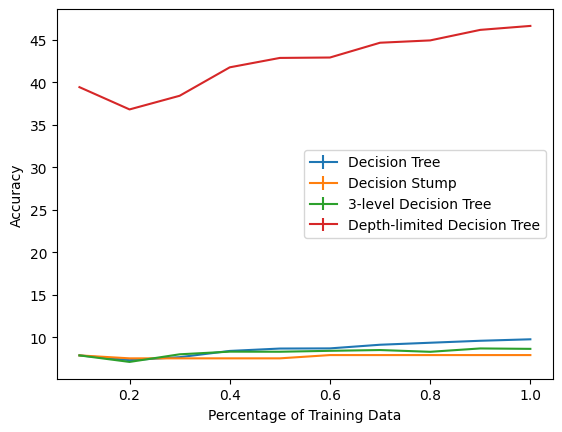

Decision Tree Accuracy =  0.8659076923076922  ( 0.14881293129533488 )
Decision Stump Accuracy =  0.7765384615384615  ( 0.1020057719680259 )
3-level Decision Tree =  0.8225923076923078  ( 0.11556089892756437 )


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score

def evaluatePerformance():
    '''
    Evaluate the performance of decision trees,
    averaged over 100 trials of 10-fold cross-validation

    Return:
      a matrix giving the performance that will contain the following entries:
      stats[0,0] = mean accuracy of decision tree
      stats[0,1] = std deviation of decision tree accuracy
      stats[1,0] = mean accuracy of decision stump
      stats[1,1] = std deviation of decision stump accuracy
      stats[2,0] = mean accuracy of 3-level decision tree
      stats[2,1] = std deviation of 3-level decision tree accuracy

    ** Note that your implementation must follow this API**
    '''

    # Load Data
    filename = '/content/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n, d = X.shape

    # shuffle the data
    idx = np.arange(n)
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Initialize variables for collecting results
    decision_tree_accuracies = []
    decision_stump_accuracies = []
    dt3_accuracies = []

    # Additional decision trees of varying limited depths
    dt_depth_accuracies = {2: [], 4: [], 6: []}

    # Initialize learning curve variables
    learning_curve_means = np.zeros((10, 4))
    learning_curve_stddevs = np.zeros((10, 4))

    # 100 trials of 10-fold cross-validation
    for _ in range(100):
        for i in range(10):
            # Split the data into train and test folds
            start = i * (n // 10)
            end = (i + 1) * (n // 10)

            Xtest = X[start:end, :]
            ytest = y[start:end, :]

            for j in range(1, 11):
                # Use j% of the training data
                train_size = int(j * 0.1 * (n - n // 10))
                Xtrain = X[:train_size, :]
                ytrain = y[:train_size, :]

                # Train the decision tree
                clf = tree.DecisionTreeClassifier()
                clf = clf.fit(Xtrain, ytrain)

                # Output predictions on the test fold
                y_pred = clf.predict(Xtest)

                # Compute accuracy for the decision tree
                acc_decision_tree = accuracy_score(ytest, y_pred)
                decision_tree_accuracies.append(acc_decision_tree)

                learning_curve_means[j-1, 0] += acc_decision_tree
                learning_curve_stddevs[j-1, 0] += acc_decision_tree ** 2

                # Train the decision stump
                clf_stump = tree.DecisionTreeClassifier(max_depth=1)
                clf_stump = clf_stump.fit(Xtrain, ytrain)

                # Output predictions on the test fold
                y_pred_stump = clf_stump.predict(Xtest)

                # Compute accuracy for decision stump
                acc_decision_stump = accuracy_score(ytest, y_pred_stump)
                decision_stump_accuracies.append(acc_decision_stump)

                learning_curve_means[j-1, 1] += acc_decision_stump
                learning_curve_stddevs[j-1, 1] += acc_decision_stump ** 2

                # Train the 3-level decision tree
                clf_dt3 = tree.DecisionTreeClassifier(max_depth=3)
                clf_dt3 = clf_dt3.fit(Xtrain, ytrain)

                # Output predictions on the test fold
                y_pred_dt3 = clf_dt3.predict(Xtest)

                # Compute accuracy for 3-level decision tree
                acc_dt3 = accuracy_score(ytest, y_pred_dt3)
                dt3_accuracies.append(acc_dt3)

                learning_curve_means[j-1, 2] += acc_dt3
                learning_curve_stddevs[j-1, 2] += acc_dt3 ** 2

                # Train additional decision trees of varying limited depths
                for depth in [2, 4, 6, 8, 10]:
                    if depth not in dt_depth_accuracies:
                      dt_depth_accuracies[depth] = []
                    clf_depth = tree.DecisionTreeClassifier(max_depth=depth)
                    clf_depth = clf_depth.fit(Xtrain, ytrain)

                    # Output predictions on the test fold
                    y_pred_depth = clf_depth.predict(Xtest)

                    # Compute accuracy for the additional decision trees
                    acc_depth = accuracy_score(ytest, y_pred_depth)
                    dt_depth_accuracies[depth].append(acc_depth)

                    learning_curve_means[j-1, 3] += acc_depth
                    learning_curve_stddevs[j-1, 3] += acc_depth ** 2

    # Compute mean and standard deviation for each classifier
    meanDecisionTreeAccuracy = np.mean(decision_tree_accuracies) if decision_tree_accuracies else np.nan
    stddevDecisionTreeAccuracy = np.std(decision_tree_accuracies) if decision_tree_accuracies else np.nan

    meanDecisionStumpAccuracy = np.mean(decision_stump_accuracies) if decision_stump_accuracies else np.nan
    stddevDecisionStumpAccuracy = np.std(decision_stump_accuracies) if decision_stump_accuracies else np.nan

    meanDT3Accuracy = np.mean(dt3_accuracies) if dt3_accuracies else np.nan
    stddevDT3Accuracy = np.std(dt3_accuracies) if dt3_accuracies else np.nan

    # Compute mean and standard deviation for the learning curve
    learning_curve_means /= 100
    learning_curve_stddevs = np.sqrt(learning_curve_stddevs / 100 - learning_curve_means ** 2)

    # Make certain that the return value matches the API specification
    stats = np.zeros((3, 2))
    stats[0, 0] = meanDecisionTreeAccuracy
    stats[0, 1] = stddevDecisionTreeAccuracy
    stats[1, 0] = meanDecisionStumpAccuracy
    stats[1, 1] = stddevDecisionStumpAccuracy
    stats[2, 0] = meanDT3Accuracy
    stats[2, 1] = stddevDT3Accuracy

    # Plot the learning curve
    x_vals = np.arange(0.1, 1.1, 0.1)
    plt.errorbar(x_vals, learning_curve_means[:, 0], yerr=learning_curve_stddevs[:, 0], label='Decision Tree')
    plt.errorbar(x_vals, learning_curve_means[:, 1], yerr=learning_curve_stddevs[:, 1], label='Decision Stump')
    plt.errorbar(x_vals, learning_curve_means[:, 2], yerr=learning_curve_stddevs[:, 2], label='3-level Decision Tree')
    plt.errorbar(x_vals, learning_curve_means[:, 3], yerr=learning_curve_stddevs[:, 3], label='Depth-limited Decision Tree')

    plt.xlabel('Percentage of Training Data')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return stats

# Do not modify from HERE...
if __name__ == "__main__":
    stats = evaluatePerformance()
    print("Decision Tree Accuracy = ", stats[0, 0], " (", stats[0, 1], ")")
    print("Decision Stump Accuracy = ", stats[1, 0], " (", stats[1, 1], ")")
    print("3-level Decision Tree = ", stats[2, 0], " (", stats[2, 1], ")")
# ...to HERE.
